In [76]:
#Predict Startup Life expectency using Regression

In [77]:
import matplotlib.pyplot as plt #Matplotlibfor plots
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder #State variable
from sklearn.metrics import mean_squared_error, r2_score #Model Fitness check Metrics
from sklearn.impute import KNNImputer
import numpy as np

In [78]:
data = pd.read_csv("C:/Users/Welcome/Downloads/Life Expectancy Data.csv")
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [79]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [80]:
#preprocessing
print("RowsXcolumns\n",data.shape)
print("Data Types\n",data.info())

RowsXcolumns
 (2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  


In [81]:
print("Null check in %\n",data.isna().sum()/data.shape[0]*100)#Percentage of null values

Null check in %
 Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.

In [82]:
#check for any unsuppuorted characters
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"*10)

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


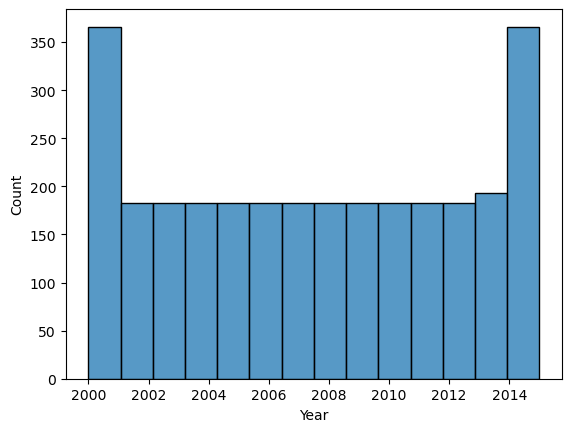

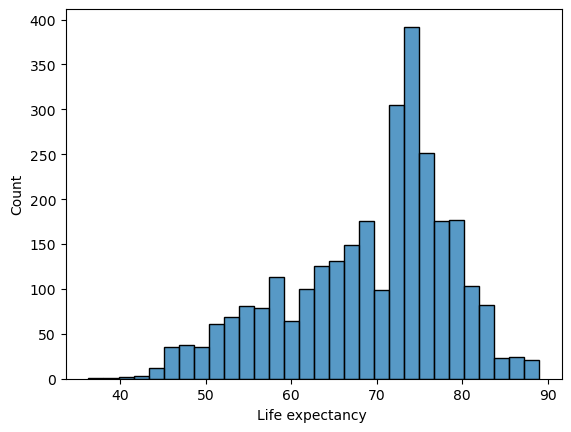

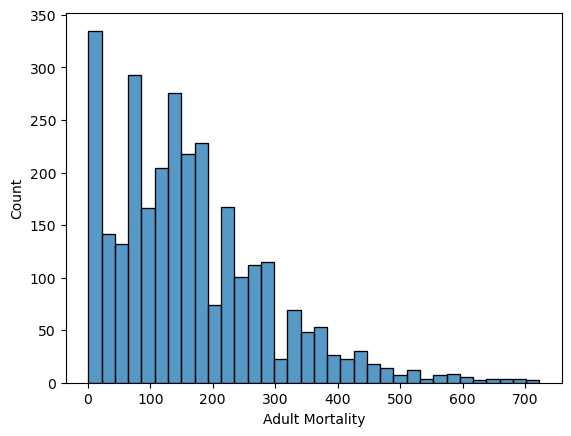

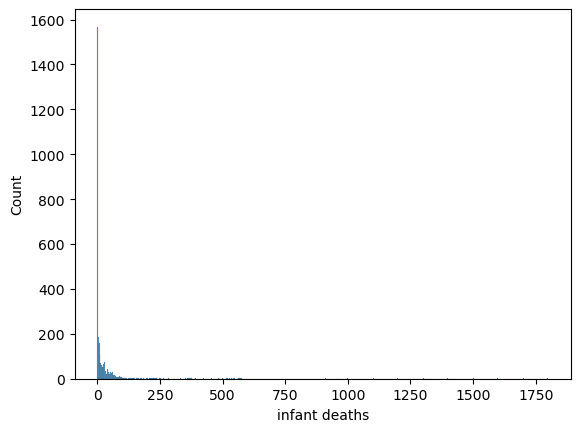

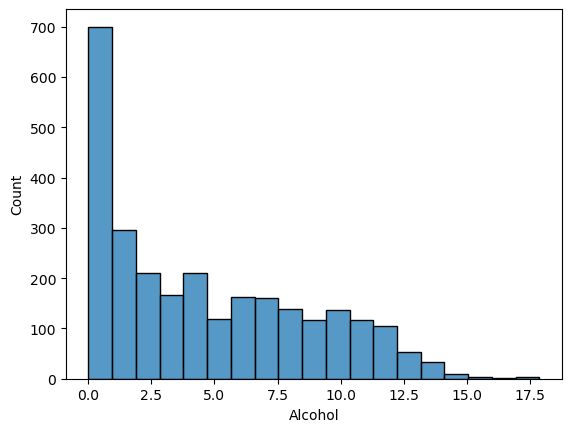

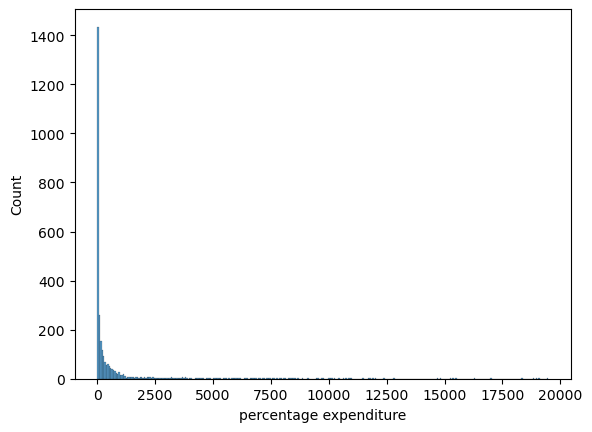

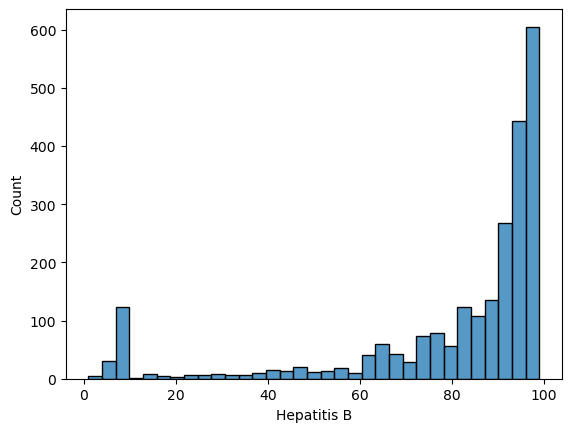

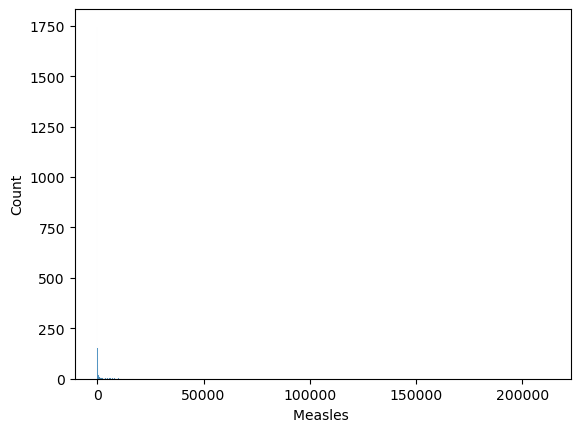

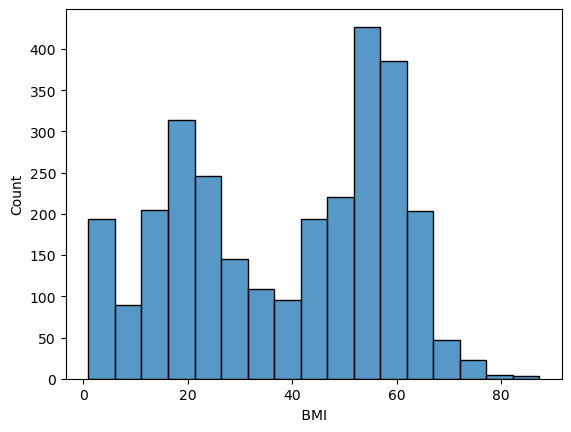

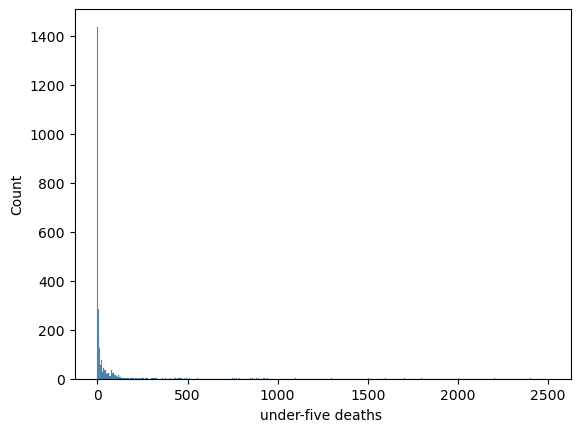

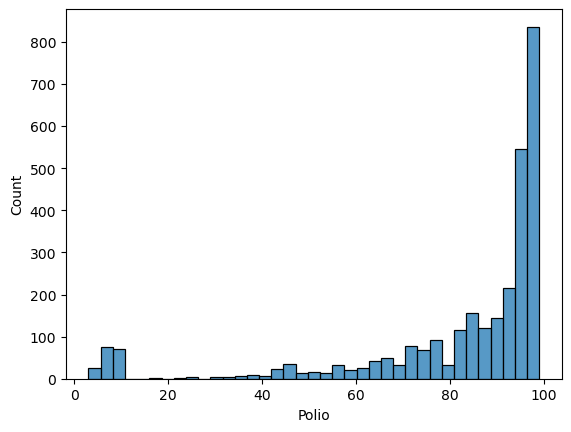

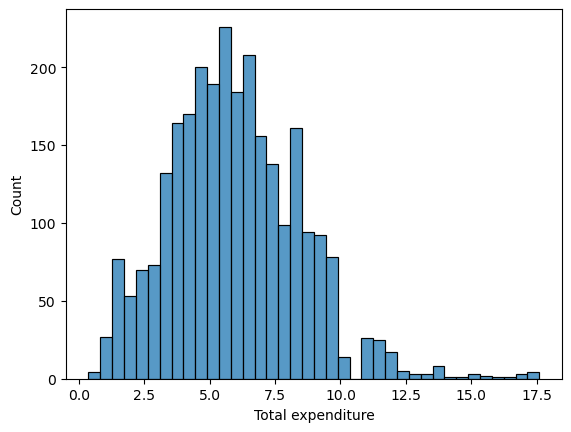

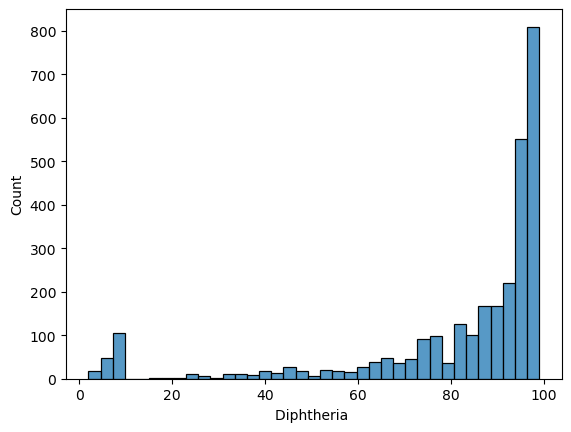

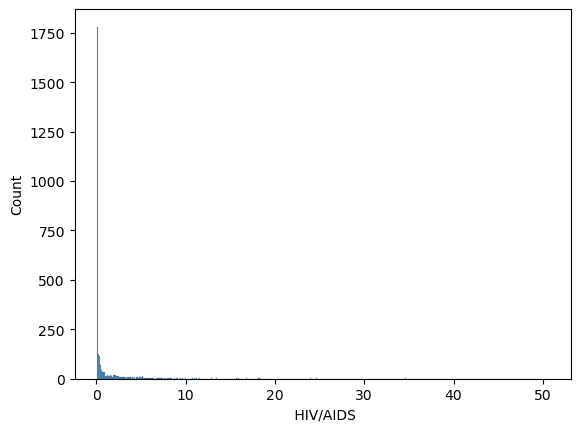

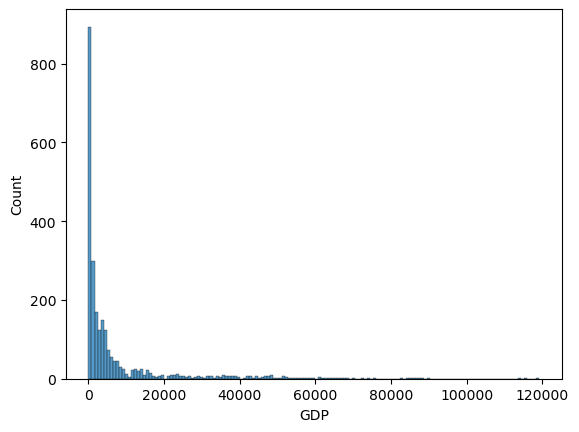

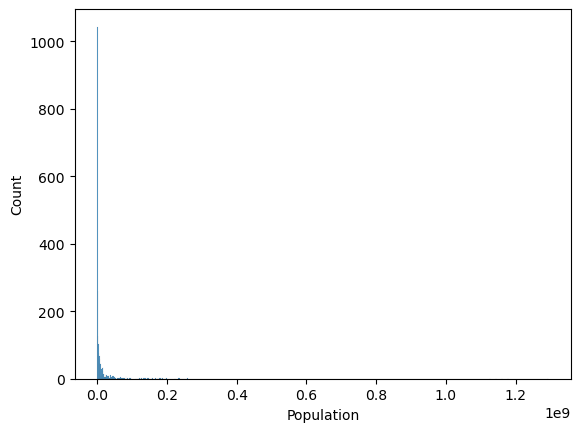

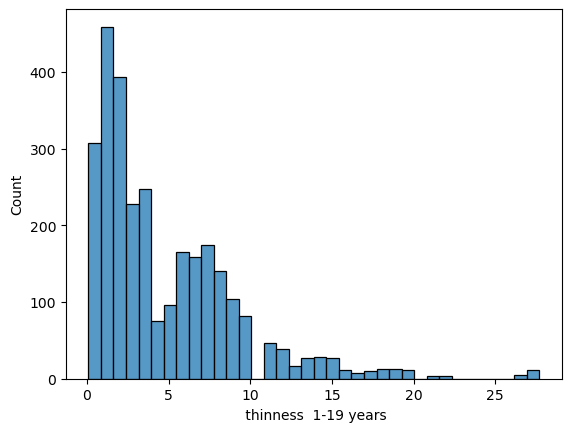

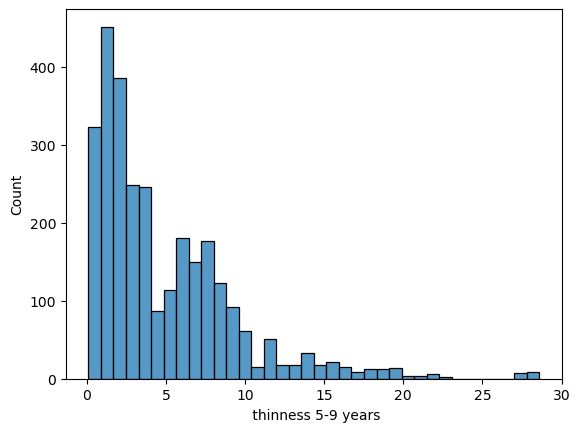

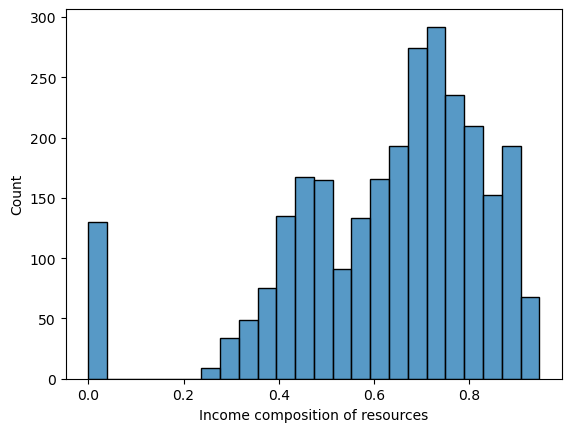

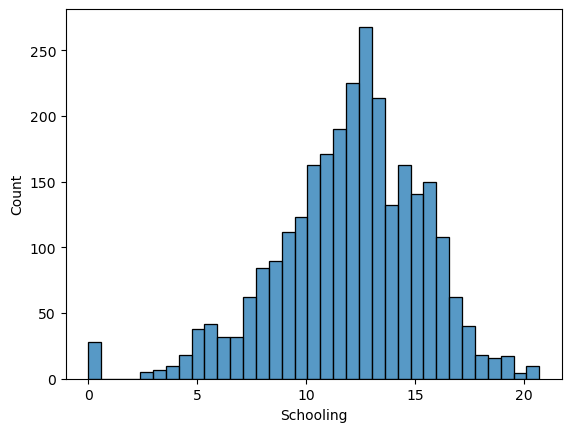

In [83]:
#Distribution check
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data=data,x=i)
    plt.show()
    

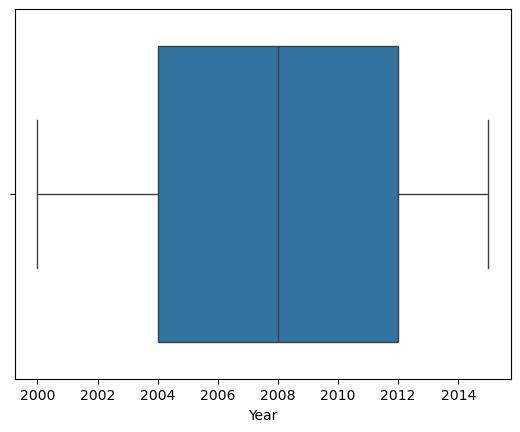

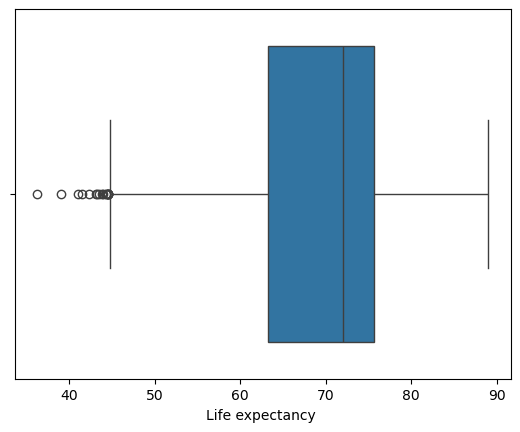

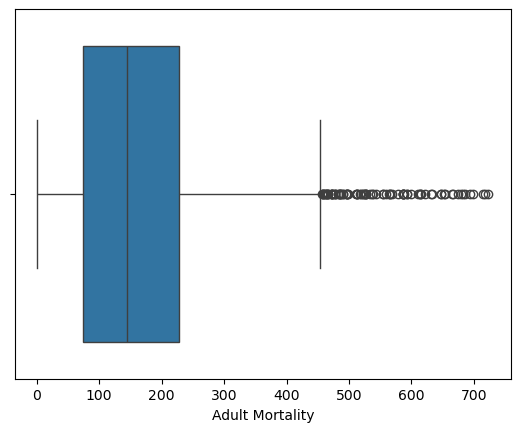

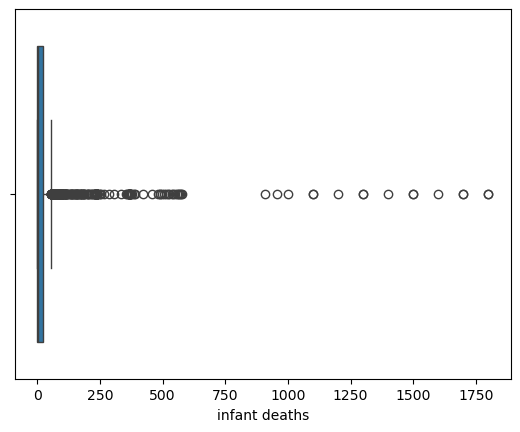

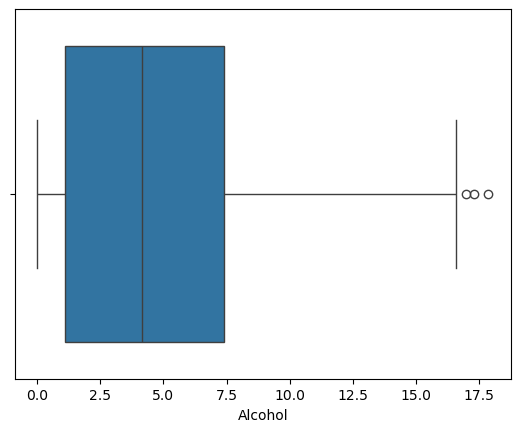

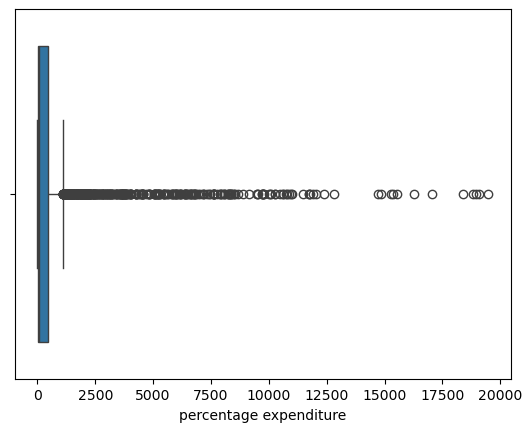

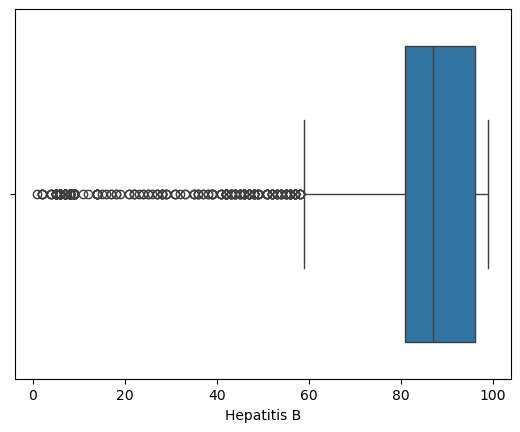

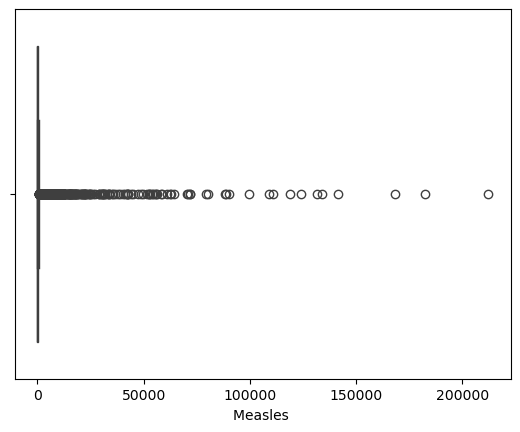

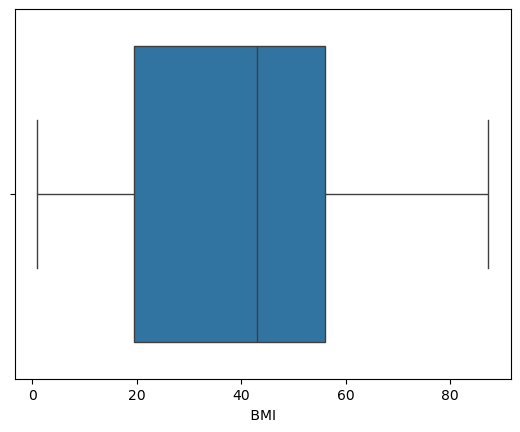

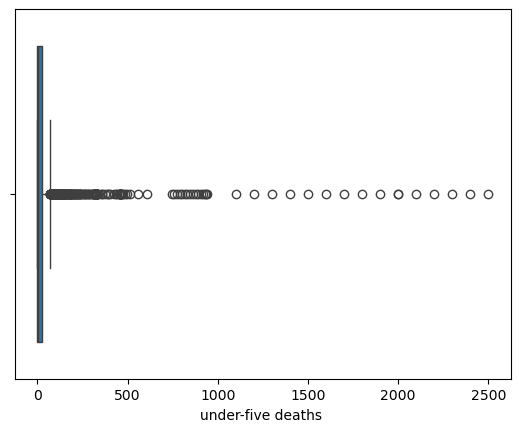

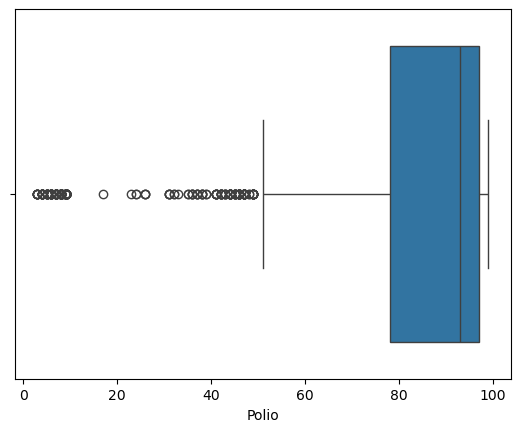

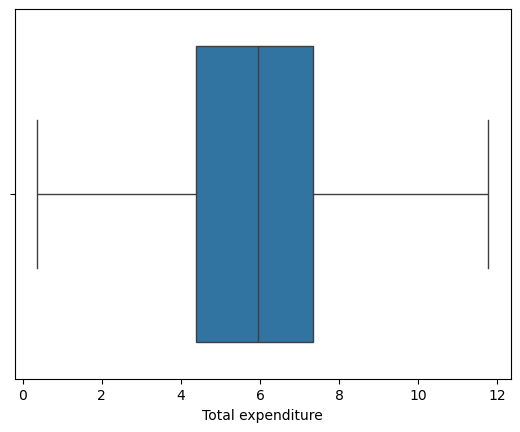

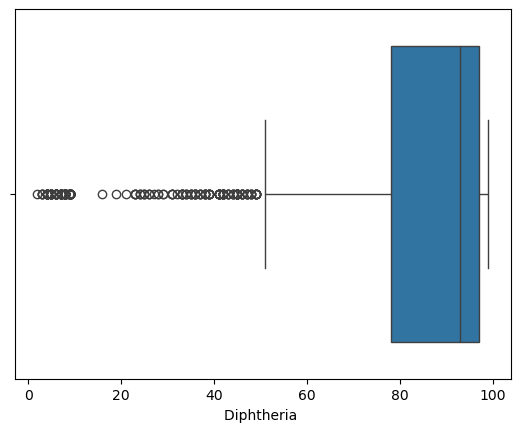

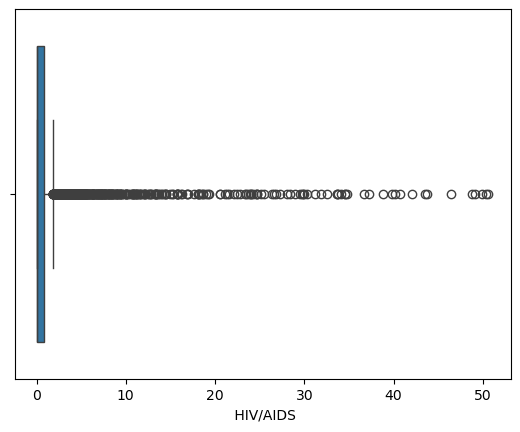

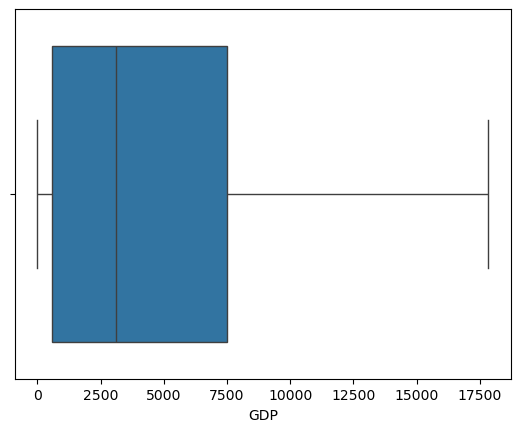

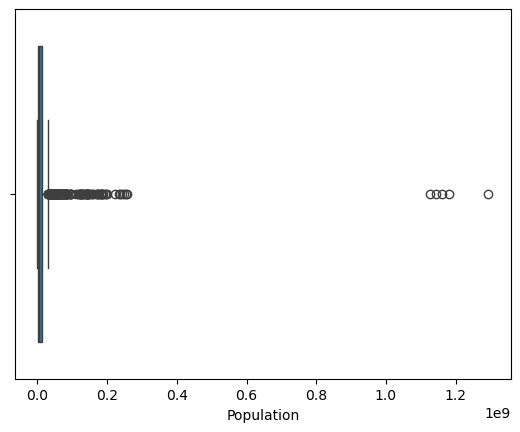

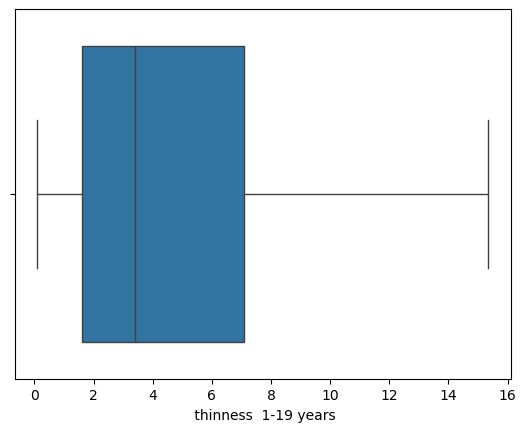

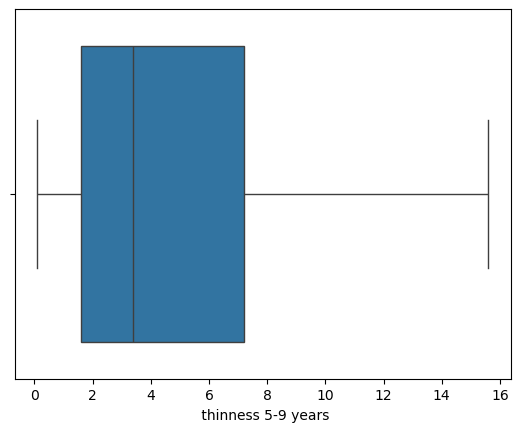

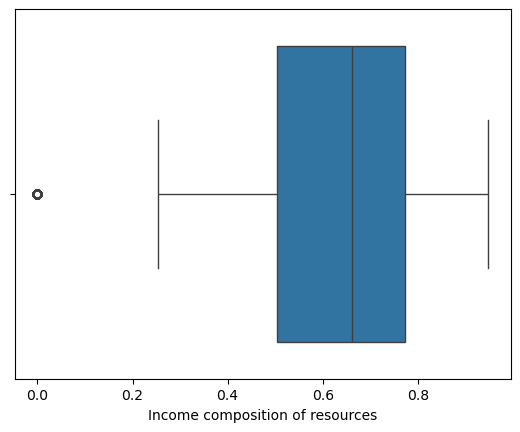

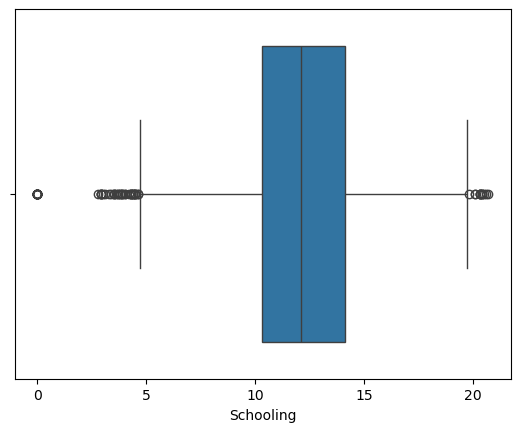

In [96]:
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

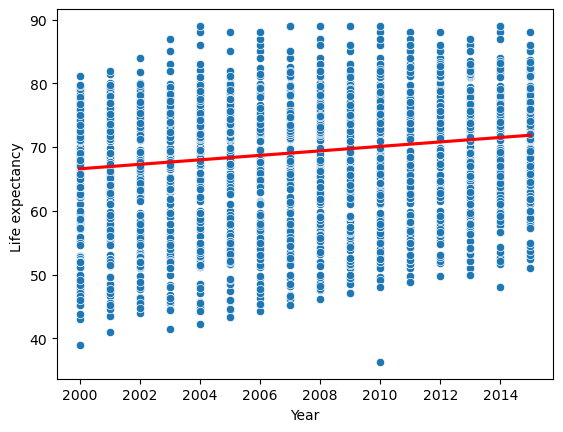

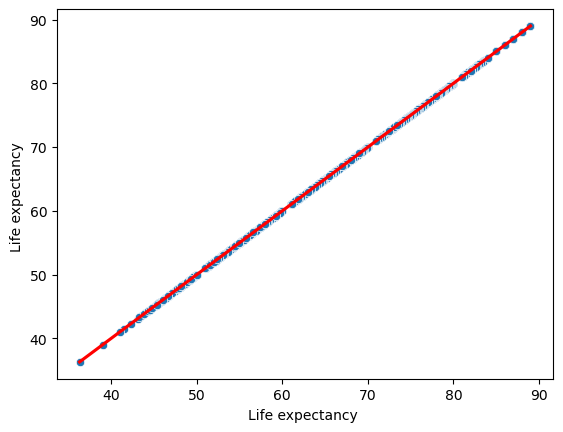

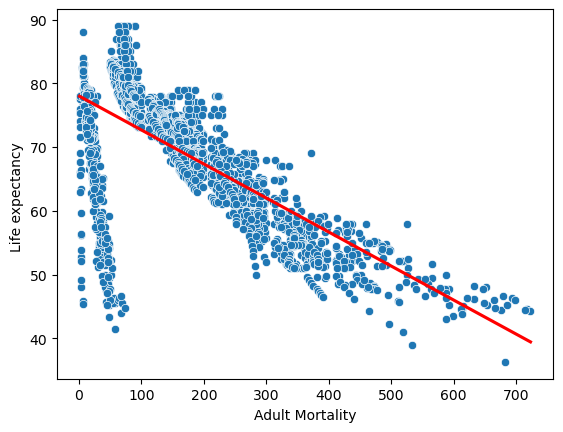

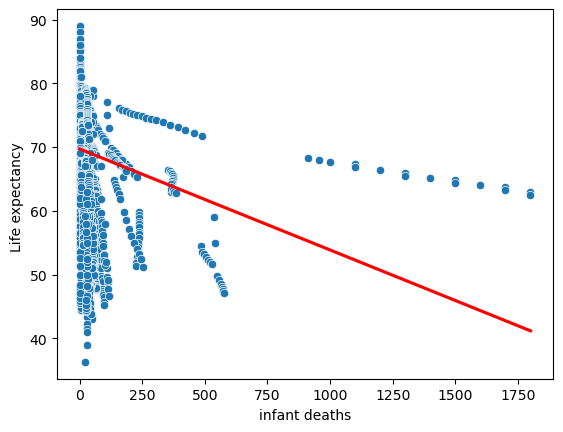

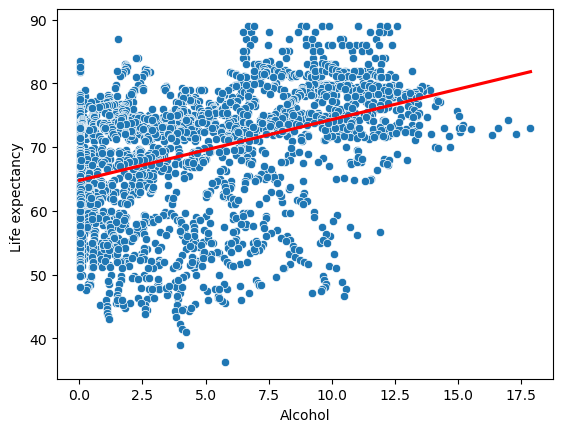

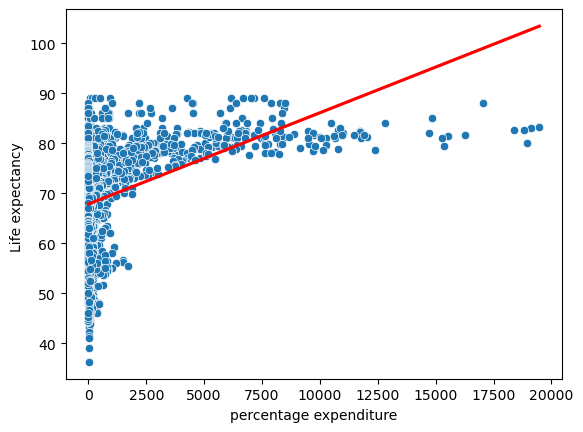

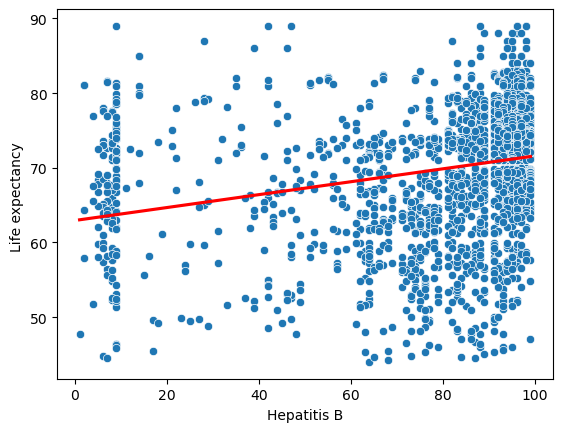

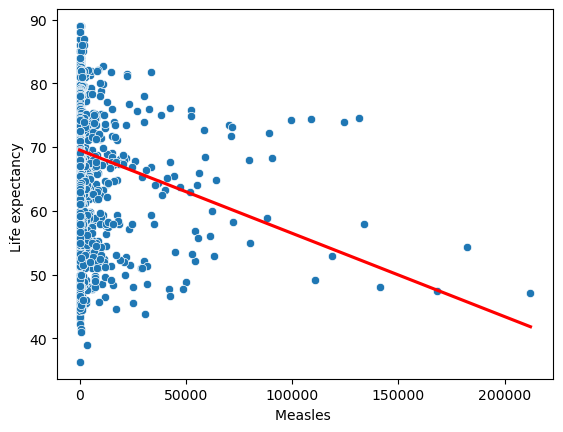

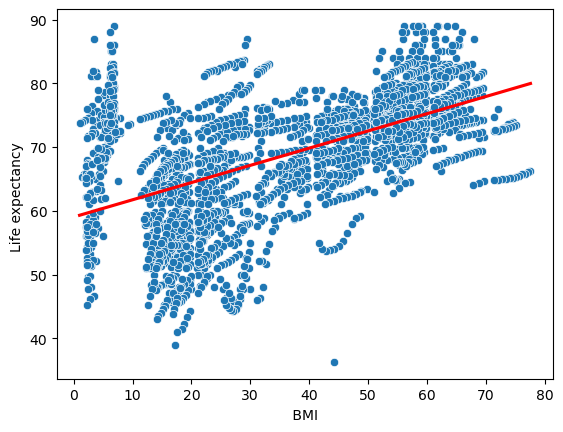

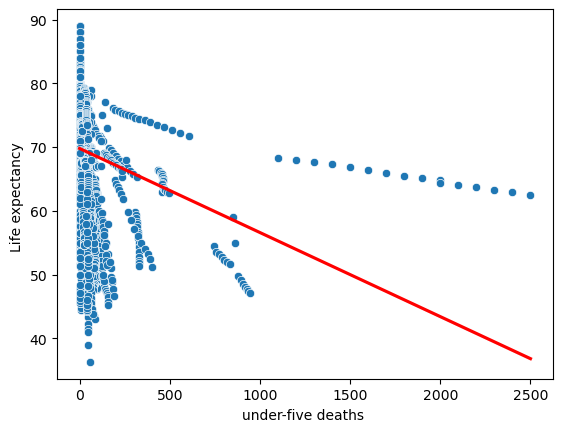

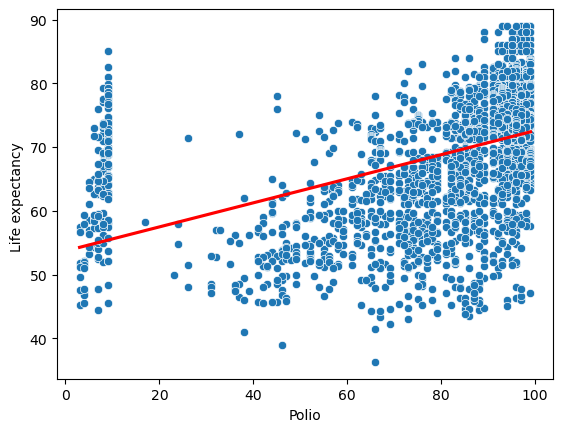

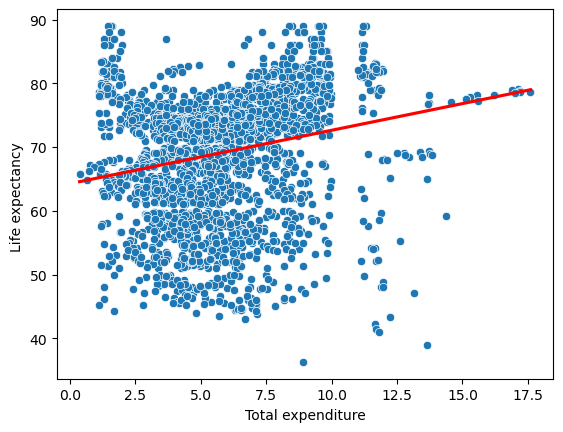

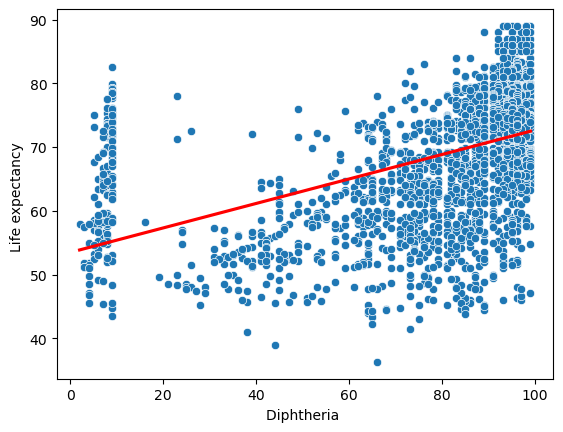

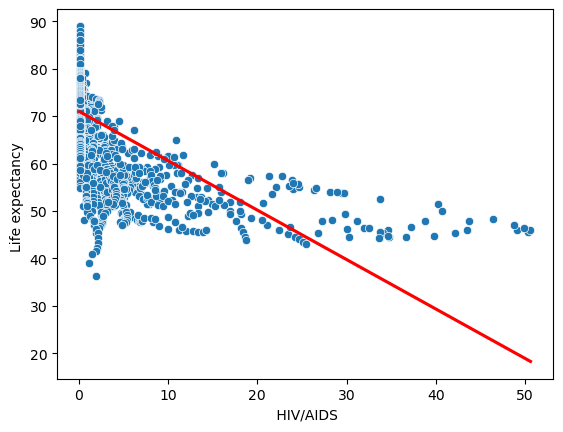

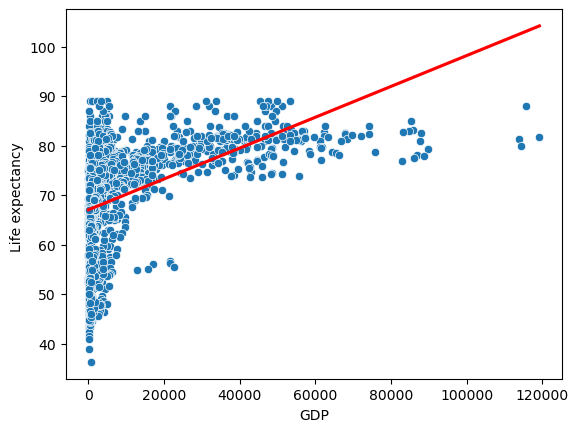

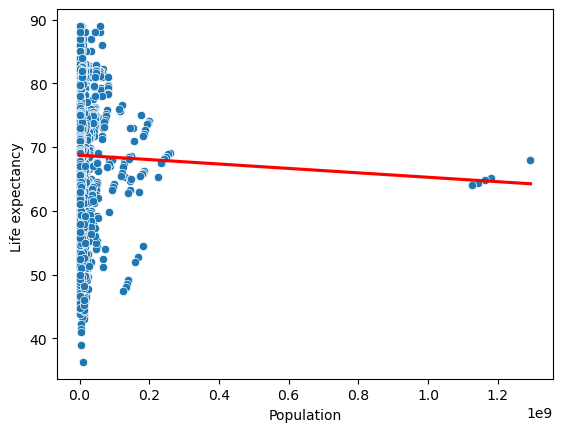

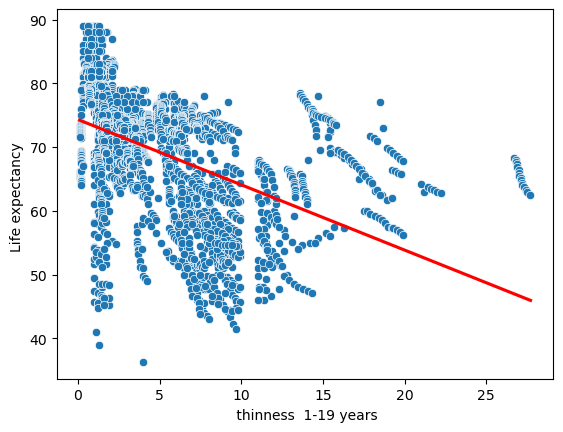

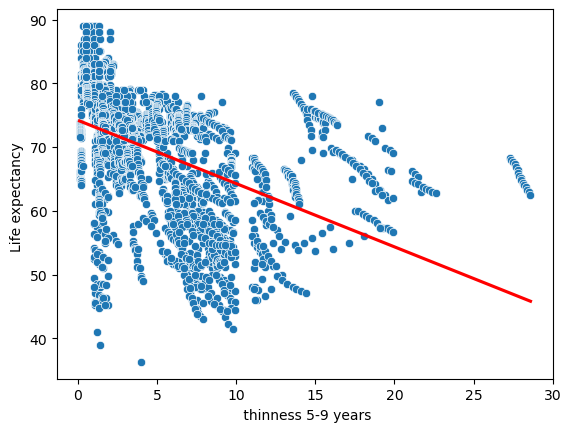

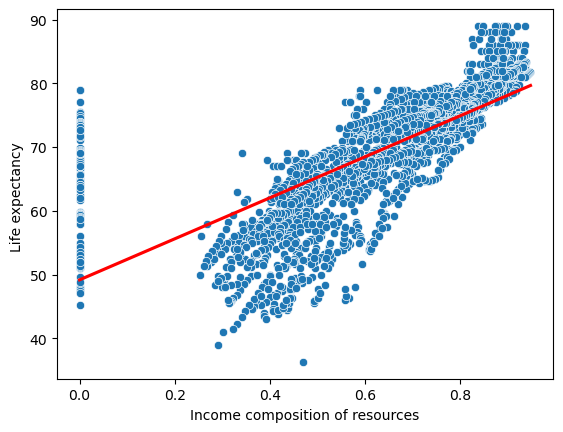

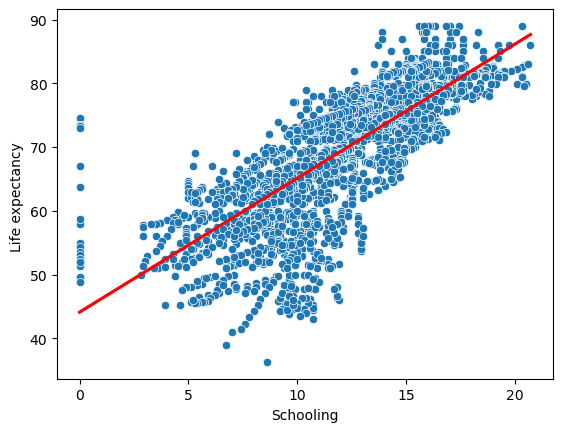

In [85]:
d=data.select_dtypes(include = 'number').columns

for i in d:
    sns.scatterplot(data=data,x=i,y= 'Life expectancy ')
    sns.regplot(x=i, y='Life expectancy ', data=data, scatter=False, color='red', ci=0.95)
    plt.show()

<Axes: >

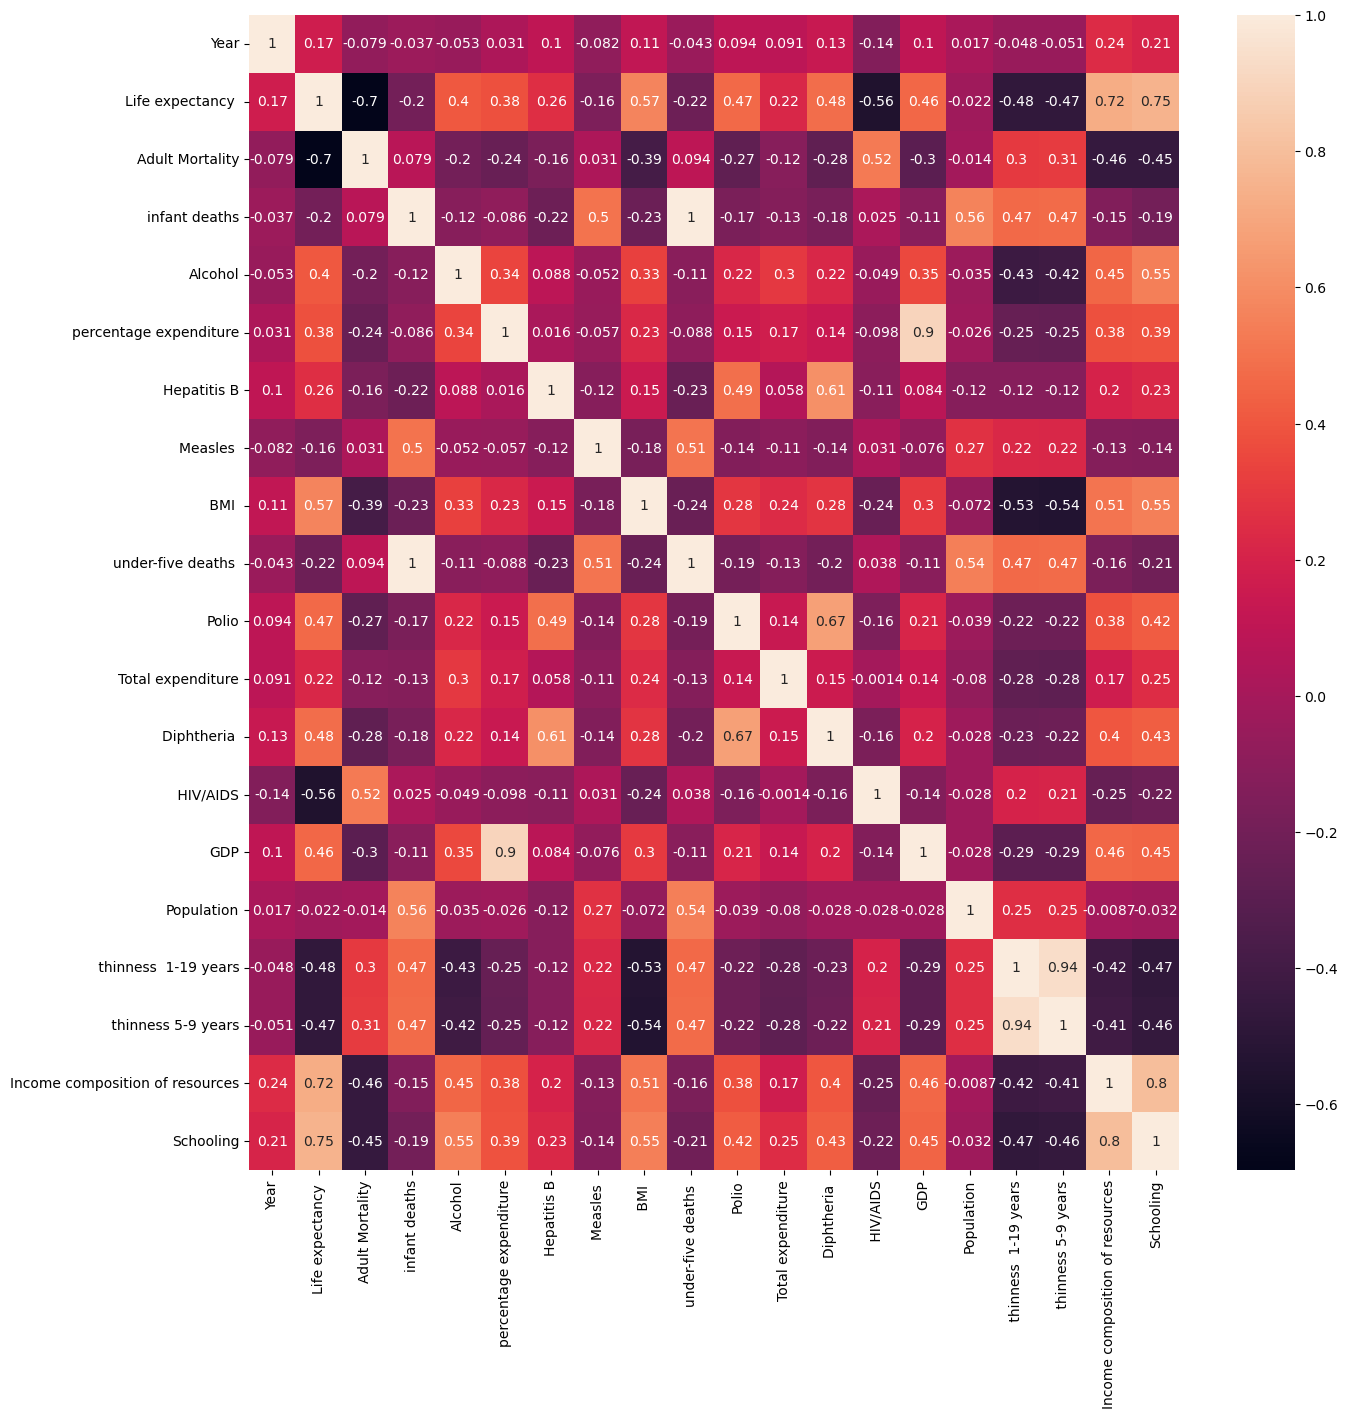

In [86]:
c = data.select_dtypes(include= 'number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(c,annot = True)

In [87]:
impute = KNNImputer()

for i in data.select_dtypes(include = 'number').columns:
    data[i]=impute.fit_transform(data[[i]])

In [88]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [89]:
def hilo(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw
    
hilo(data['Total expenditure'])

(-0.0699999999999994, 11.77)

In [92]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',' thinness 5-9 years']:
    lw,uw=hilo(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])



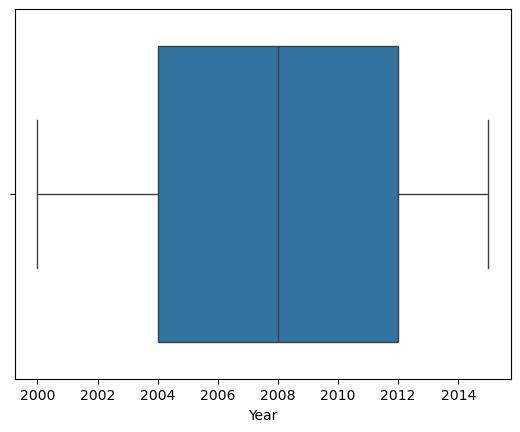

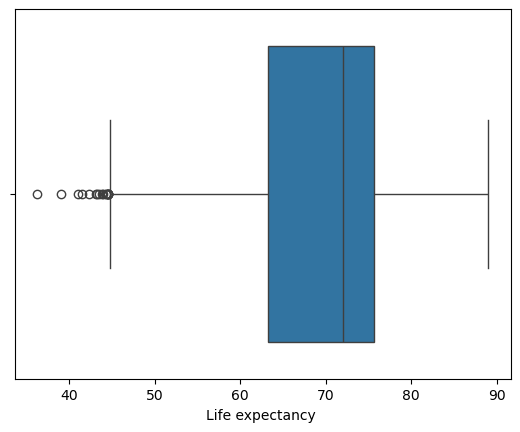

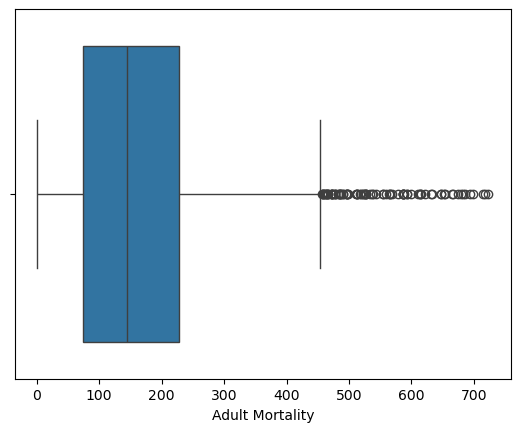

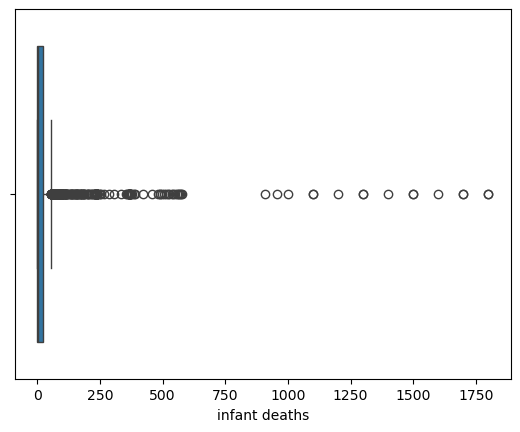

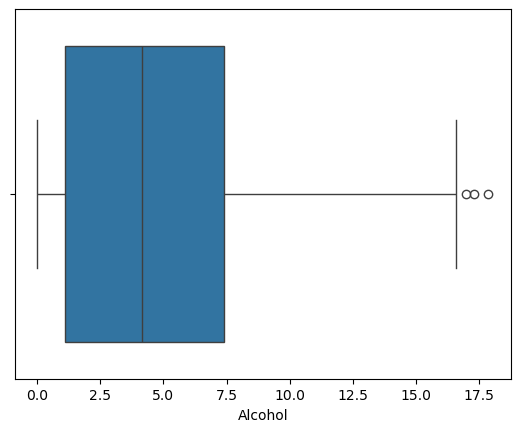

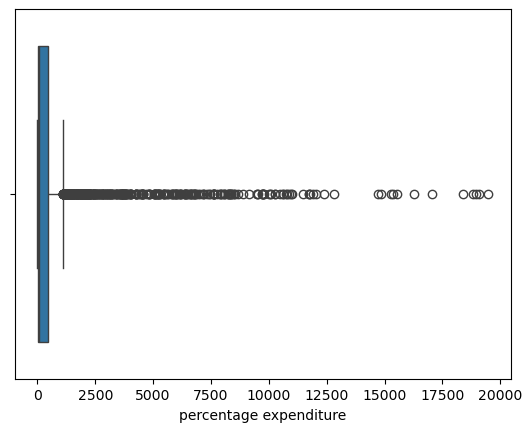

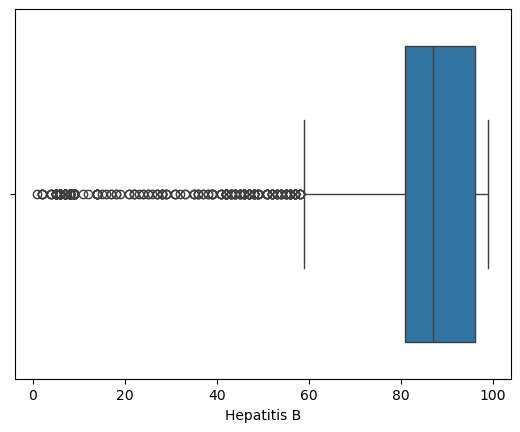

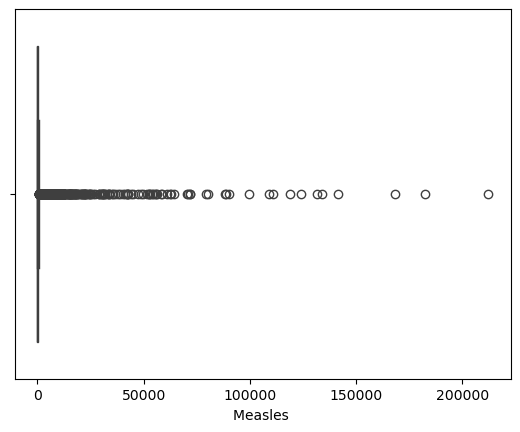

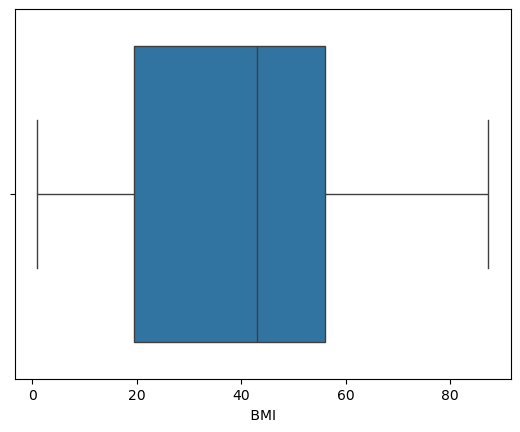

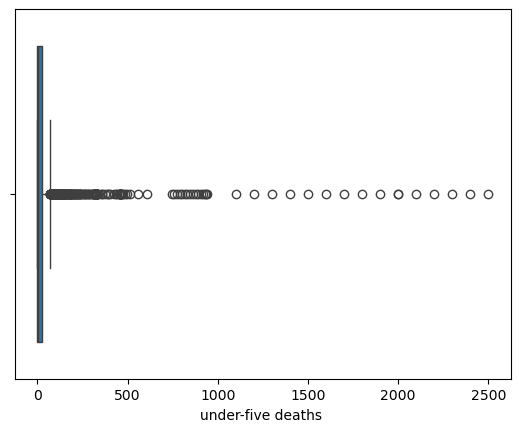

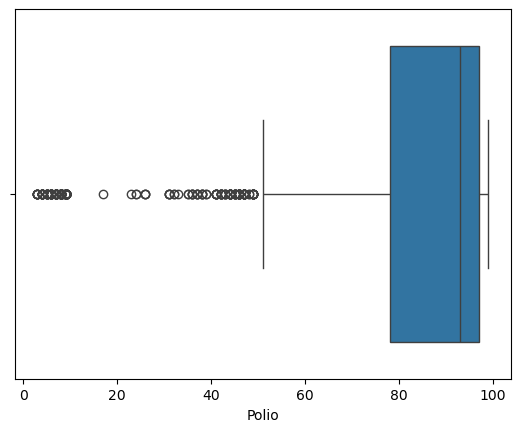

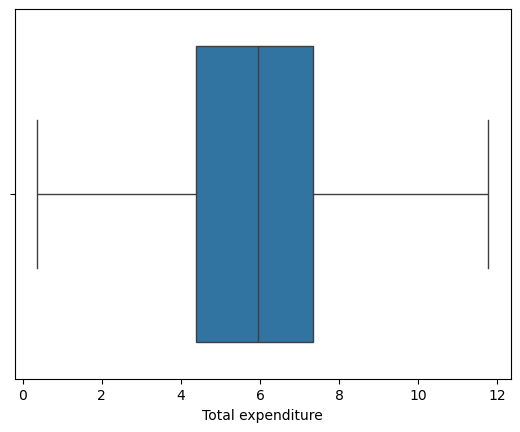

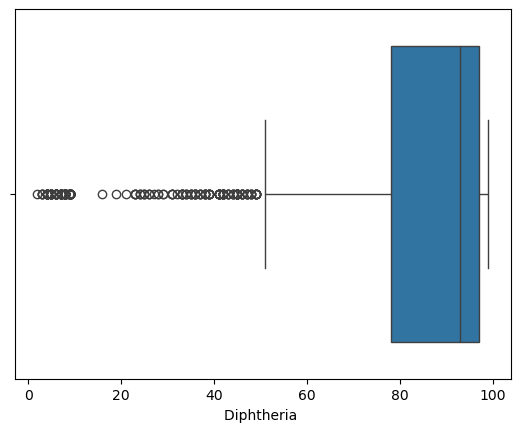

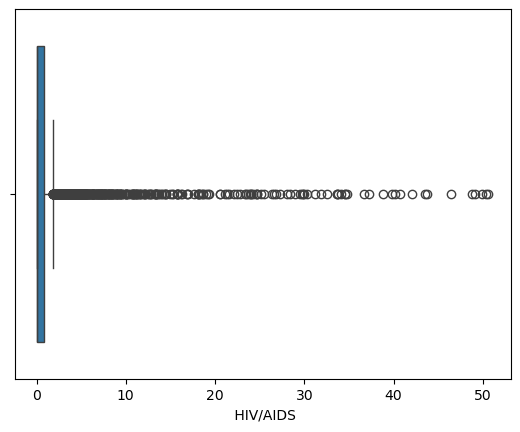

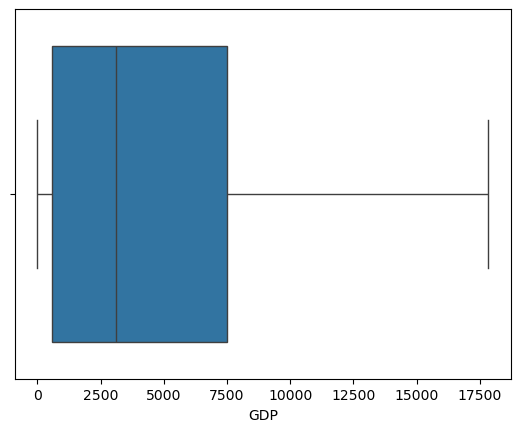

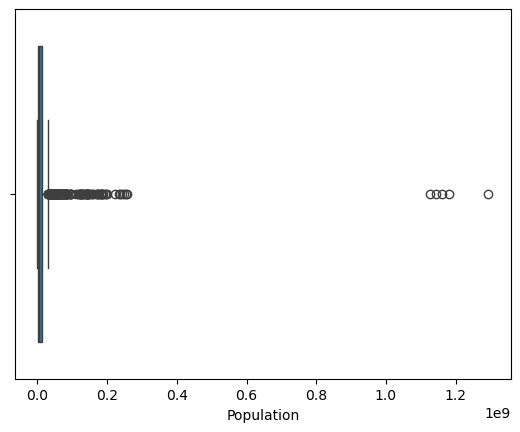

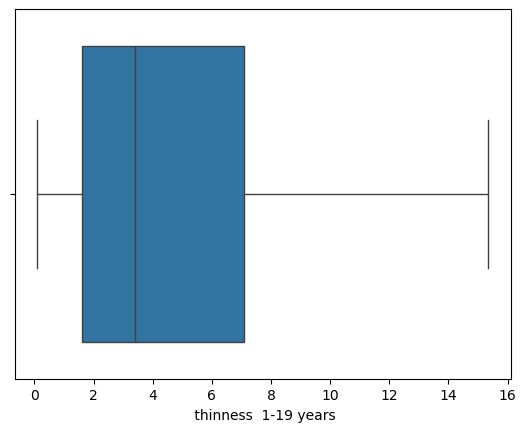

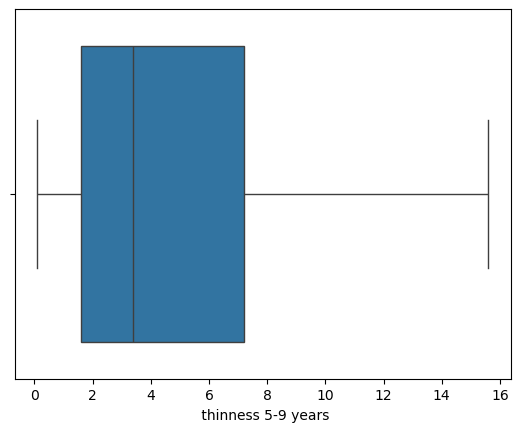

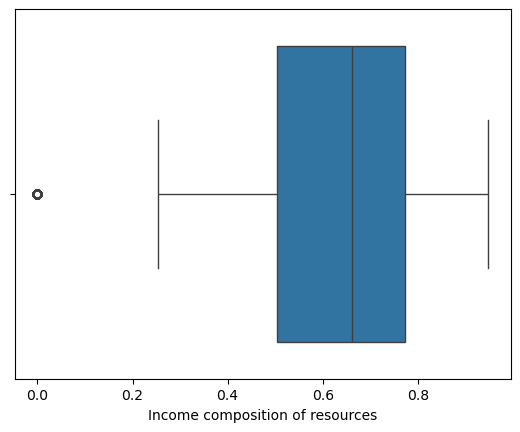

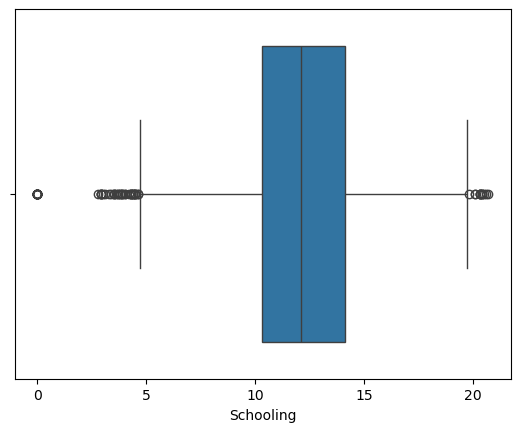

In [93]:
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [128]:
Clean_data = pd.get_dummies(data=data,columns=['Country',"Status"],drop_first=True)
Clean_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


In [133]:
X = Clean_data.drop(columns=['Life expectancy '])
Scaler = StandardScaler()

for i in X.select_dtypes(include = 'number').columns:
    X[i]= Scaler.fit_transform(X[[i]])
    
    

y= data['Life expectancy ']
X.values
y.values

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [135]:
print("RowsXcolumns\n",X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("RowsXcolumns\n","Train shape:\n",X_train.shape,"\nTest shape:\n",X_test.shape)

RowsXcolumns
 (2938, 212)
RowsXcolumns
 Train shape:
 (2350, 212) 
Test shape:
 (588, 212)


In [136]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)


lr.predict(X[0:5])


array([60.64594699, 60.53509109, 60.2355678 , 59.96855589, 59.62650662])

      Actual  Predicted
2546    73.7  70.467340
650     75.9  75.732927
1740    74.2  74.657720
177     76.8  77.422695
1377    51.9  51.436565


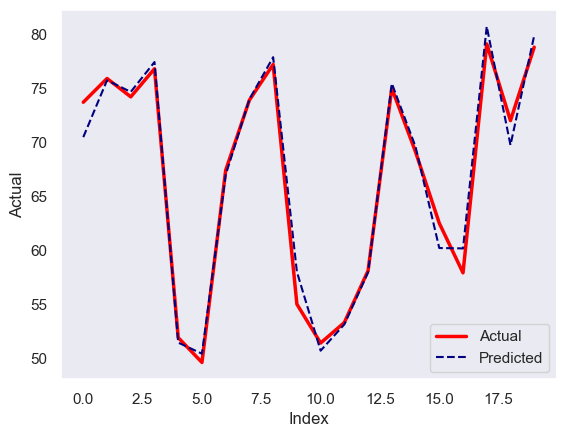

In [142]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(predictions.head())
sns.set(style="dark")
predictions['Index'] = range(len(predictions))
sns.lineplot(data=predictions.head(20), x='Index', y='Actual', label='Actual', color='red', linewidth=2.5)
sns.lineplot(data=predictions.head(20), x='Index', y='Predicted', label='Predicted', color='Navy', linestyle='--')


plt.show()

In [143]:
print("Model Strength:",lr.score(X,y))

Model Strength: 0.9626653529032032


In [144]:
lr.intercept_


77.8426126193179